# Air Resistance Computational Activity

This accompanies activity L08. The question:

A cannon is fired from a cannon with parameters given in cell 2. Assume the initial height is negligible. Complete this notebook to find the horizontal distance that the cannonball travels before hitting the ground, accounting for air resistance.

You are free to change any variables you like. Note that, depending on your variables, your answer may be closer to or further from the no drag case, as shown in Figure 2.8 from the textbook.

![Several paths, one of which is parabolic (labelled k=0) and the others of which are nested inside it. Each path has a different value of k but all other values are the same. The greater k becomes, the smaller and more skewed the path becomes.](Fig2-8.png)

The basic structure for your solution is laid out below. It is up to you to correctly calculate the motion. You will primarily want to change how the position, velocity, and acceleration are calculated, but you may find other things you need or want to change along the way.

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [2]:
#Variables given in problem
theta = radians(30) #Angle of the cannon from the horizontal, in radians
v0    = 200         #Initial velocity of the cannonball,      in m/s
g     = 9.8         #Gravitational acceleration (on Earth),   in m/s^2
m     = 12          #Mass of the cannonball,                  in kg
c     = 0.47        #Drag coefficient of the cannonball,      (unitless)
y0    = 0           #Initial height of the cannonball,        in meters
x0    = 0           #Initial x-position of the cannonball,    in meters
r     = 0.1         #Radius of the 
rho   = 1

In [3]:
#Variables to operate on/with. Start by assigning initial values
#Given in problem
x  = x0               #x position,     in m
y  = y0               #y position,     in m
vx = v0*np.cos(theta) #x velocity,     in m/s
vy = v0*np.sin(theta) #y velocity,     in m/s
ax = 0                #x acceleration, in m/s^2
ay = -g               #y acceleration, in m/s^2
#Adjustable
ts = 1e-3             #Time step,      in s
tm = 10               #Maximum time,   in s
#Create Arrays
t_a   = np.arange(0,tm,ts) #Generate a range of times from 0 to tm with an interval ts "t_a(rray)"
pos_t = np.zeros((len(t_a),2)) #Create a zero array the size of t_a to store the position  "pos(ition_of)_t"
vel_t = np.zeros((len(t_a),2)) #Create a zero array the size of t_a to store the velocity  "vel(ocity_of)_t"
acc_t = np.zeros((len(t_a),2)) #Create a zero array the size of t_a to store the acceleration "acc(eleration_of)_t"

In [4]:
#Equations of motion
def pos(i): #position vector as a function of an INDEX corresponding to a time
    position = pos_t[i-1] #Get the previous position value
    position += [0,0]     #Alter the position somehow
    return position       #Return the newly calculated value
def vel(i): #velocity vector as a function of an INDEX corresponding to a time
    velocity = vel_t[i-1] #Get the previous velocity value
    velocity += [0,0]     #Alter the velocity somehow
    return velocity       #Return the newly calculated value
def acc(i): #acceleration vector as a function of an INDEX corresponding to a time
    axnew = ax + 0 #The horizontal acceleration is dependent on something.
    aynew = ay + 0 #The vertical acceleration is dependent on something.
    return [axnew,aynew] #Return the newly calculated value

def pos_nodrag(i): #position vector as a function of an INDEX corresponding to a time
    position = pos_t[i-1] #Get the previous position value
    position += [0,0]     #Alter the position somehow
    return position       #Return the newly calculated value
def vel_nodrag(i): #velocity vector as a function of an INDEX corresponding to a time
    velocity = vel_t[i-1] #Get the previous velocity value
    velocity += [0,0]     #Alter the velocity somehow
    return velocity       #Return the newly calculated value
def acc_nodrag(i): #acceleration vector as a function of an INDEX corresponding to a time
    axnew = ax + 0 #The horizontal acceleration is dependent on something.
    aynew = ay + 0 #The vertical acceleration is dependent on something.
    return [axnew,aynew] #Return the newly calculated value

In [5]:
#Calculation

#Initialize - our zeroth point can't be a function of a point we don't have!
acc_t[0] = [0,0]   #The initial acceleration is something.
vel_t[0] = [vx,vy] #The initial velocity is given in the problem.
pos_t[0] = [x,y]   #The initial position is given in the problem.
#And for dragless
acc_tnd[0] = [0,0]   #The initial acceleration is something.
vel_tnd[0] = [vx,vy] #The initial velocity is given in the problem.
pos_tnd[0] = [x,y]   #The initial position is given in the problem.

for i in range(1,len(t_a)): #For every point starting at the FIRST point, and not the zeroth:
    acc_t[i] = acc(i)  #Calculate acceleration,
    vel_t[i] = vel(i)  #THEN velocity,
    pos_t[i] = pos(i)  #THEN position.
    #And for dragless
    acc_t[i] = acc(i)  #Calculate acceleration,
    vel_t[i] = vel(i)  #THEN velocity,
    pos_t[i] = pos(i)  #THEN position.

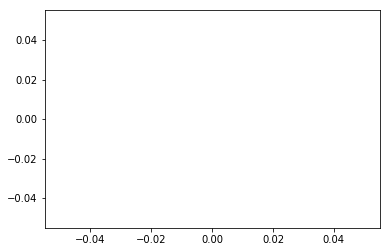

In [7]:
#Plot
plt.plot(pos_t[:,0],pos_t[:,1]) #Generate a plot
plt.plot(pos_tnd[:,0],pos_tnd[:,1])
plt.show()                      #Show the plot

*Textbook used is Classical Dynamics by Thornton & Marion.*